In [30]:
import pandas as pd
Signupdata = pd.read_csv('/home/mvisi/Project/DLP/Core/FraudPredict/Notebook/Arpan/Data/signup_2020_all_Final_Before_Encoding_new_After_Encode.csv', error_bad_lines=False)

In [31]:
Signupdata.shape

(185188, 44)

In [32]:
Signupdata.columns

Index(['Fraud_Acc_Flag', 'EIDStatus', 'SanctionStatus', 'Ip_Latitude',
       'Ip_Longitude', 'Ip_Carrier', 'Ip_Connection_type', 'Ip_Line_Speed',
       'Ip_Routing_type', 'IP_Anonymizer_status', 'Fullcontact_Matched',
       'Social_Profiles_Count', 'gender_Fullcontact', 'ageRange_Fullcontact',
       'location_Country_Fullcontact', 'browser_online', 'brwsr_lang',
       'brwsr_type', 'brwsr_version', 'device_manufacturer', 'device_name',
       'device_type', 'device_os_type', 'screen_resolution', 'address_type',
       'aza', 'country_of_residence', 'email_domain', 'region_suburb',
       'residential_status', 'title', 'ad_campaign', 'affiliate_name',
       'branch', 'channel', 'keywords', 'op_country', 'referral_text',
       'reg_mode', 'search_engine', 'source', 'sub_source', 'turnover',
       'txn_value'],
      dtype='object')

In [33]:
#Taking only those columns as requested by business
Signup_required = Signupdata.filter(['Fraud_Acc_Flag','Ip_Latitude',
       'Ip_Longitude', 'Ip_Carrier', 'Ip_Connection_type', 'Ip_Line_Speed',
       'Ip_Routing_type', 'IP_Anonymizer_status', 'Fullcontact_Matched',
       'Social_Profiles_Count','ageRange_Fullcontact',
       'location_Country_Fullcontact', 'browser_online', 'brwsr_lang',
       'brwsr_type', 'brwsr_version', 'device_manufacturer', 'device_name',
       'device_type', 'device_os_type', 'screen_resolution', 'country_of_residence', 'email_domain','residential_status','ad_campaign', 'affiliate_name','channel', 'keywords','referral_text',
       'reg_mode', 'search_engine', 'source', 'sub_source', 'turnover',
       'txn_value'], axis=1)

In [34]:
Signup_required.shape

(185188, 35)

In [35]:
Signup_required.head()

,Fraud_Acc_Flag,Ip_Latitude,Ip_Longitude,Ip_Carrier,Ip_Connection_type,Ip_Line_Speed,Ip_Routing_type,IP_Anonymizer_status,Fullcontact_Matched,Social_Profiles_Count,...,affiliate_name,channel,keywords,referral_text,reg_mode,search_engine,source,sub_source,turnover,txn_value
0,0,51.445834,-0.969723,2746,1,3,1,0,0,NaN,...,2249,7,0,0,2,0,1,41,NaN,8
1,0,51.062830,-113.888710,303,8,2,3,0,0,NaN,...,2232,4,0,0,3,0,1,110,NaN,2
2,0,51.477812,0.304293,2746,1,3,1,0,0,NaN,...,73,4,0,0,3,0,27,107,NaN,14
3,0,51.612778,-0.223333,362,4,3,1,0,0,NaN,...,2063,7,484,0,2,0,8,114,NaN,8
4,0,53.421667,-2.842778,2746,1,3,1,0,1,1.0,...,2063,7,0,0,2,0,8,114,NaN,9


In [36]:
Signup_required.isnull().sum()

Fraud_Acc_Flag                       0
Ip_Latitude                      51065
Ip_Longitude                     51065
Ip_Carrier                           0
Ip_Connection_type                   0
Ip_Line_Speed                        0
Ip_Routing_type                      0
IP_Anonymizer_status                 0
Fullcontact_Matched                  0
Social_Profiles_Count           150935
ageRange_Fullcontact                 0
location_Country_Fullcontact         0
browser_online                       0
brwsr_lang                           0
brwsr_type                           0
brwsr_version                        0
device_manufacturer                  0
device_name                          0
device_type                          0
device_os_type                       0
screen_resolution                    0
country_of_residence                 0
email_domain                         0
residential_status                   0
ad_campaign                          0
affiliate_name           

In [37]:
Signup_required_Org = Signup_required.copy()
#Imputing the NULL value with most frequent occuring for the Ip_Latitude
Signup_required['Ip_Latitude'].fillna(Signup_required['Ip_Latitude'].mode()[0],inplace=True)

#Imputing the NULL value with most frequent occuring for the turnover
Signup_required['turnover'].fillna(Signup_required['turnover'].mode()[0],inplace=True)

#Imputing the NULL value with most frequent occuring for the Ip_Longitude
Signup_required['Ip_Longitude'].fillna(Signup_required['Ip_Longitude'].mode()[0],inplace=True)

#Imputing the NULL value with most frequent occuring for the Social_Profiles_Count
Signup_required['Social_Profiles_Count'].fillna(Signup_required['Social_Profiles_Count'].mode()[0],inplace=True)

In [38]:
Signup_required.isnull().sum()

Fraud_Acc_Flag                  0
Ip_Latitude                     0
Ip_Longitude                    0
Ip_Carrier                      0
Ip_Connection_type              0
Ip_Line_Speed                   0
Ip_Routing_type                 0
IP_Anonymizer_status            0
Fullcontact_Matched             0
Social_Profiles_Count           0
ageRange_Fullcontact            0
location_Country_Fullcontact    0
browser_online                  0
brwsr_lang                      0
brwsr_type                      0
brwsr_version                   0
device_manufacturer             0
device_name                     0
device_type                     0
device_os_type                  0
screen_resolution               0
country_of_residence            0
email_domain                    0
residential_status              0
ad_campaign                     0
affiliate_name                  0
channel                         0
keywords                        0
referral_text                   0
reg_mode      

In [39]:
#Seperating Dependent and independent variables 
#data_final_Org= data_final.copy()
Signup_required_ML = Signup_required.copy()
X_Signupdata = Signup_required.drop(['Fraud_Acc_Flag'], axis=1, inplace=True)
Y_Signupdata = Signup_required_ML.Fraud_Acc_Flag

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Signup_required, Y_Signupdata, test_size=0.30, random_state=42)

In [41]:
#Applying XGBoost Classification
import xgboost as xgb
XGBClassifier = xgb.XGBClassifier()
XGBClassifier.fit(X_train,y_train)

/home/mvisi/.local/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:20:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
from sklearn import model_selection, metrics
hardpredtst=XGBClassifier.predict(X_test)
def conf_matrix(y,pred):
    ((tn, fp), (fn, tp)) = metrics.confusion_matrix(y, pred)
    ((tnr,fpr),(fnr,tpr))= metrics.confusion_matrix(y, pred, 
            normalize='true')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(Legit)', 'True 1(Fraud)'], 
            columns=['Pred 0(Approve as Legit)', 
                            'Pred 1(Deny as Fraud)'])
conf_matrix(y_test,hardpredtst)

,Pred 0(Approve as Legit),Pred 1(Deny as Fraud)
True 0(Legit),TN = 55287 (TNR = 99.96%),FP = 20 (FPR = 0.04%)
True 1(Fraud),FN = 166 (FNR = 66.40%),TP = 84 (TPR = 33.60%)


In [43]:
predtstXGBC=XGBClassifier.predict_proba(X_test)[:,1] #rerun again


#for XGBClassifer
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(y_test, predtstXGBC)
    i = np.arange(len(tpr)) 
    # tpr -(1-fpr) is zero near the optimal point
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold']),roc

In [45]:
import numpy as np
from sklearn.metrics import roc_curve
Optimal_Cutoff,roc = Find_Optimal_Cutoff(y_test.values, predtstXGBC)
print (Optimal_Cutoff)

[0.002305733971297741]


In [47]:
hardpredtst_tuned_threshXGBCT = np.where(predtstXGBC >= 0.002305733971297741, 1, 0)
conf_matrix(y_test, hardpredtst_tuned_threshXGBCT)

,Pred 0(Approve as Legit),Pred 1(Deny as Fraud)
True 0(Legit),TN = 49333 (TNR = 89.20%),FP = 5974 (FPR = 10.80%)
True 1(Fraud),FN = 27 (FNR = 10.80%),TP = 223 (TPR = 89.20%)


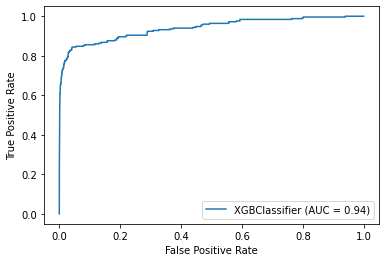

In [60]:
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.metrics import plot_roc_curve
plot_roc_curve(XGBClassifier, X_test, y_test) 
plt.show()

In [49]:
#Oversampling the data to handle imbalance
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.95) #80
X_train_os, y_train_os = os.fit_resample(X_train,y_train)
print("The number of class before fit {}".format(Counter(y_train)))
print("The number of class after fit {}".format(Counter(y_train_os)))

/home/mvisi/.local/lib/python3.6/site-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.95 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


The number of class before fit Counter({0: 129050, 1: 581})
The number of class after fit Counter({0: 129050, 1: 122597})


In [52]:
#Applying XGBoost Classification
import xgboost as xgb
XGBClassifier_os = xgb.XGBClassifier()
XGBClassifier_os.fit(X_train_os,y_train_os)

/home/mvisi/.local/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:40:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
from sklearn import model_selection, metrics
hardpredtst_os=XGBClassifier_os.predict(X_test)
def conf_matrix(y,pred):
    ((tn, fp), (fn, tp)) = metrics.confusion_matrix(y, pred)
    ((tnr,fpr),(fnr,tpr))= metrics.confusion_matrix(y, pred, 
            normalize='true')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(Legit)', 'True 1(Fraud)'], 
            columns=['Pred 0(Approve as Legit)', 
                            'Pred 1(Deny as Fraud)'])
conf_matrix(y_test,hardpredtst)

,Pred 0(Approve as Legit),Pred 1(Deny as Fraud)
True 0(Legit),TN = 55287 (TNR = 99.96%),FP = 20 (FPR = 0.04%)
True 1(Fraud),FN = 166 (FNR = 66.40%),TP = 84 (TPR = 33.60%)


In [55]:
predtstXGBC_os=XGBClassifier_os.predict_proba(X_test)[:,1] #rerun again


#for XGBClassifer
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(y_test, predtstXGBC_os)
    i = np.arange(len(tpr)) 
    # tpr -(1-fpr) is zero near the optimal point
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold']),roc

In [56]:
import numpy as np
from sklearn.metrics import roc_curve
Optimal_Cutoff,roc = Find_Optimal_Cutoff(y_test.values, predtstXGBC_os)
print (Optimal_Cutoff)

[0.01437988318502903]


In [57]:
hardpredtst_tuned_threshXGBCT_os = np.where(predtstXGBC_os >= 0.01437988318502903, 1, 0)
conf_matrix(y_test, hardpredtst_tuned_threshXGBCT_os)

,Pred 0(Approve as Legit),Pred 1(Deny as Fraud)
True 0(Legit),TN = 47774 (TNR = 86.38%),FP = 7533 (FPR = 13.62%)
True 1(Fraud),FN = 34 (FNR = 13.60%),TP = 216 (TPR = 86.40%)


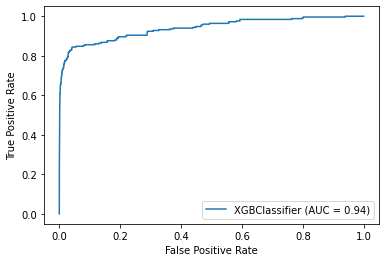

In [89]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(XGBClassifier_os, X_test, y_test) 
plt.show()

# XGBoost on unsampled data gives better result compared to XGBoost on oversampled data

In [61]:
## Hyper Parameter Optimization for XGBoost Classifier

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
"scale_pos_weight"  : [1, 10, 25, 50, 75, 99, 100, 200]
    
}

In [62]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [63]:
#cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=None)
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [65]:
#https://machinelearningmastery.com/xgboost-for-imbalanced-classification/
XGBClassifier = xgb.XGBClassifier()
random_search=RandomizedSearchCV(XGBClassifier,param_distributions=params,n_iter=6,scoring='accuracy',n_jobs=-1,#cv=4,
                                 refit=True,cv=cv,
                                 verbose=3)

In [66]:
random_search.fit(Signup_required,Y_Signupdata)

Fitting 30 folds for each of 6 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed: 39.0min
/home/mvisi/.local/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 80.8min finished
/home/mvisi/.local/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:18:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weigh...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=6, n_jobs=-1,
                   par

In [67]:
random_search.best_estimator_


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=25, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
XGBClassifier_Tuned = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=15,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=25, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
XGBClassifier_Tuned.fit(X_train, y_train)

/home/mvisi/.local/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:47:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=25, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
from sklearn import model_selection, metrics
hardpredtst_tuned=XGBClassifier_Tuned.predict(X_test)
def conf_matrix(y,pred):
    ((tn, fp), (fn, tp)) = metrics.confusion_matrix(y, pred)
    ((tnr,fpr),(fnr,tpr))= metrics.confusion_matrix(y, pred, 
            normalize='true')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(Legit)', 'True 1(Fraud)'], 
            columns=['Pred 0(Approve as Legit)', 
                            'Pred 1(Deny as Fraud)'])
conf_matrix(y_test,hardpredtst_tuned)

,Pred 0(Approve as Legit),Pred 1(Deny as Fraud)
True 0(Legit),TN = 55237 (TNR = 99.87%),FP = 70 (FPR = 0.13%)
True 1(Fraud),FN = 89 (FNR = 35.60%),TP = 161 (TPR = 64.40%)


In [72]:
predtstXGBC_tuned=XGBClassifier_Tuned.predict_proba(X_test)[:,1] #rerun again


#for XGBClassifer
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(y_test, predtstXGBC_tuned)
    i = np.arange(len(tpr)) 
    # tpr -(1-fpr) is zero near the optimal point
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold']),roc

In [73]:

Optimal_Cutoff,roc = Find_Optimal_Cutoff(y_test.values, predtstXGBC_tuned)
print (Optimal_Cutoff)

[0.0006503670010715723]


In [74]:
hardpredtst_tuned_threshXGBCT = np.where(predtstXGBC_tuned >= 0.0006503670010715723, 1, 0)
conf_matrix(y_test, hardpredtst_tuned_threshXGBCT)

,Pred 0(Approve as Legit),Pred 1(Deny as Fraud)
True 0(Legit),TN = 48709 (TNR = 88.07%),FP = 6598 (FPR = 11.93%)
True 1(Fraud),FN = 30 (FNR = 12.00%),TP = 220 (TPR = 88.00%)


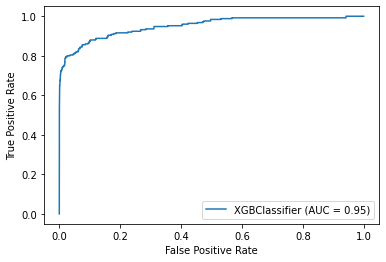

In [79]:
#import matplotlib.pylab as plt
#%matplotlib inline
from sklearn.metrics import plot_roc_curve
plot_roc_curve(XGBClassifier_Tuned, X_test, y_test) 
plt.show()

# Optimal threshold on untuned XGboost gives slight better result compared to Random search tuned XGBoost model

In [75]:
#Hyperparametertunning on Oversample data
os_fulldata=RandomOverSampler(0.95) #80
X_os, y_os = os_fulldata.fit_resample(Signup_required,Y_Signupdata)
print("The number of class before fit {}".format(Counter(Y_Signupdata)))
print("The number of class after fit {}".format(Counter(y_os)))

/home/mvisi/.local/lib/python3.6/site-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.95 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


The number of class before fit Counter({0: 184357, 1: 831})
The number of class after fit Counter({0: 184357, 1: 175139})


In [76]:
# Hyper Parameter Optimization for XGBoost Classifier

params_os={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
#"scale_pos_weight"  : [1, 10, 25, 50, 75, 99, 100, 200]
    
}

In [77]:
XGBClassifier = xgb.XGBClassifier()
random_search_os=RandomizedSearchCV(XGBClassifier,param_distributions=params_os,n_iter=6,scoring='accuracy',n_jobs=-1,#cv=4,
                                 refit=True,cv=cv,
                                 verbose=3)

In [80]:
random_search_os.fit(X_os,y_os)

Fitting 30 folds for each of 6 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed: 45.2min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 75.0min finished
/home/mvisi/.local/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:18:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weigh...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           validate_parameters=No

In [81]:
random_search_os.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
XGBClassifier_Tuned_os = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=15,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
XGBClassifier_Tuned_os.fit(X_train_os, y_train_os)

/home/mvisi/.local/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:49:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
hardpredtst_tuned_os=XGBClassifier_Tuned_os.predict(X_test)
def conf_matrix(y,pred):
    ((tn, fp), (fn, tp)) = metrics.confusion_matrix(y, pred)
    ((tnr,fpr),(fnr,tpr))= metrics.confusion_matrix(y, pred, 
            normalize='true')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(Legit)', 'True 1(Fraud)'], 
            columns=['Pred 0(Approve as Legit)', 
                            'Pred 1(Deny as Fraud)'])
conf_matrix(y_test,hardpredtst_tuned_os)

,Pred 0(Approve as Legit),Pred 1(Deny as Fraud)
True 0(Legit),TN = 55203 (TNR = 99.81%),FP = 104 (FPR = 0.19%)
True 1(Fraud),FN = 84 (FNR = 33.60%),TP = 166 (TPR = 66.40%)


In [85]:
predtstXGBC_tuned_os=XGBClassifier_Tuned_os.predict_proba(X_test)[:,1] #rerun again


#for XGBClassifer
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(y_test, predtstXGBC_tuned_os)
    i = np.arange(len(tpr)) 
    # tpr -(1-fpr) is zero near the optimal point
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold']),roc

In [86]:

Optimal_Cutoff,roc = Find_Optimal_Cutoff(y_test.values, predtstXGBC_tuned_os)
print (Optimal_Cutoff)

[0.0004091068112757057]


In [87]:
hardpredtst_tuned_threshXGBCT_os = np.where(predtstXGBC_tuned_os >= 0.0004091068112757057, 1, 0)
conf_matrix(y_test, hardpredtst_tuned_threshXGBCT_os)

,Pred 0(Approve as Legit),Pred 1(Deny as Fraud)
True 0(Legit),TN = 48892 (TNR = 88.40%),FP = 6415 (FPR = 11.60%)
True 1(Fraud),FN = 29 (FNR = 11.60%),TP = 221 (TPR = 88.40%)


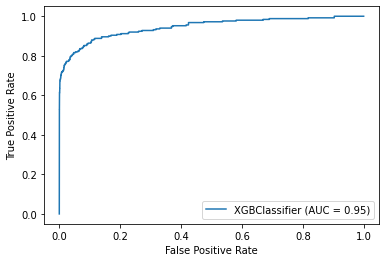

In [88]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(XGBClassifier_Tuned_os, X_test, y_test) 
plt.show()

# Tuned XGboost model on oversample gives better result than Tuned XGboost model on unsampled data. The result is similar to untuned XGboost model on unsampled data